In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("retail_sales_dataset.csv")
df.columns = df.columns.str.lower()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  phone             2823 non-null   object 
 15  addressline1      2823 non-null   object 
 16  addressline2      302 non-null    object 


In [12]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [13]:
df.isnull().sum()

ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64

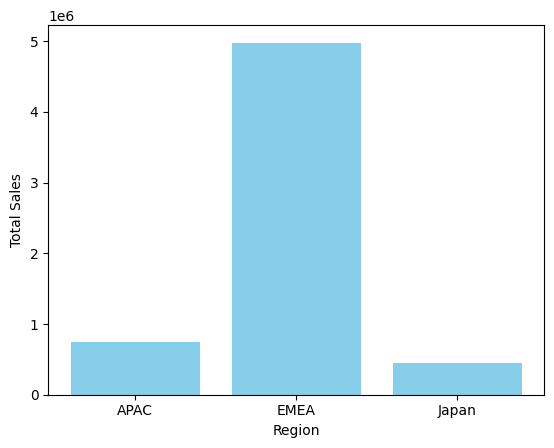

In [27]:
sales_by_region = df.groupby('territory')['sales'].sum().reset_index()
plt.bar(sales_by_region['territory'], sales_by_region['sales'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

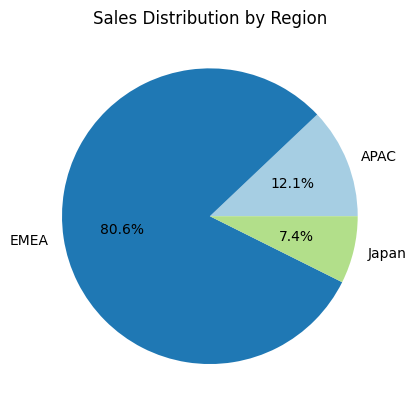

In [28]:
plt.pie(sales_by_region['sales'], labels=sales_by_region['territory'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Region')
plt.show()

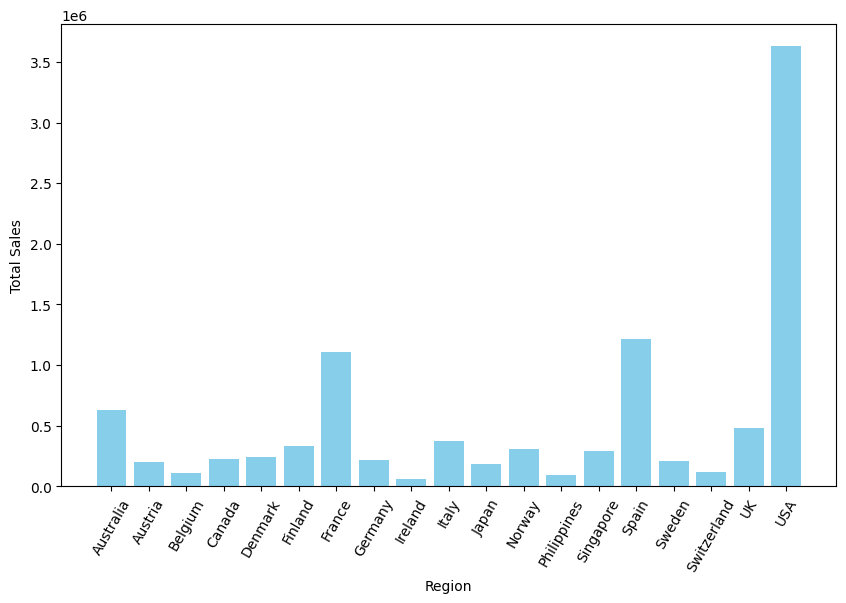

In [26]:
sales_by_country = df.groupby('country')['sales'].sum().reset_index()
plt.figure(figsize=(10, 6))

plt.bar(sales_by_country['country'], sales_by_country['sales'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=60)
plt.show()

In [33]:
sales_by_region_product = df.groupby(['territory', 'productline'])['sales'].sum().reset_index()
sales_by_region_product

,territory,productline,sales
0,APAC,Classic Cars,244758.07
1,APAC,Motorcycles,89968.76
2,APAC,Planes,74853.87
3,APAC,Ships,4159.76
4,APAC,Trains,1681.35
5,APAC,Trucks and Buses,121847.96
6,APAC,Vintage Cars,208852.06
7,EMEA,Classic Cars,2086994.66
8,EMEA,Motorcycles,503096.70
9,EMEA,Planes,476122.91


In [34]:
top_regions = sales_by_region.sort_values(by='sales', ascending=False)
top_regions

,territory,sales
1,EMEA,4979272.41
0,APAC,746121.83
2,Japan,455173.22
